# Iterated PCA (IPCA)

In [1]:
import os, sys
sys.path.append(os.path.abspath('../src'))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.decomposition

In [3]:
import xpca

In [4]:
first_year = 2008; last_year = 2020

In [5]:
df = pd.read_parquet('../data/equity_indices.parquet')

In [6]:
df = df[str(first_year):str(last_year)]

In [7]:
df.head()

,DY,ES,EW,FX,MX,NQ,RTY,X,YM
Datetime,,,,,,,,,
2008-01-01 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001823
2008-01-01 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000383
2008-01-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000671
2008-01-01 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000862
2008-01-01 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001821


In [8]:
df.tail()

,DY,ES,EW,FX,MX,NQ,RTY,X,YM
Datetime,,,,,,,,,
2020-12-31 12:00:00,0.0,0.001415,0.001830,0.0,0.0,0.001778,0.000304,0.0,0.001128
2020-12-31 13:00:00,0.0,-0.000336,-0.000652,0.0,0.0,-0.000702,-0.000609,0.0,-0.000398
2020-12-31 14:00:00,0.0,0.002895,0.002132,0.0,0.0,0.002030,0.001827,0.0,0.003115
2020-12-31 15:00:00,0.0,0.002819,-0.002171,0.0,0.0,0.002182,-0.001216,0.0,0.002941
2020-12-31 16:00:00,0.0,0.001138,0.002785,0.0,0.0,0.001030,0.002080,0.0,0.000461


In [9]:
model = sklearn.decomposition.PCA()

In [10]:
model.fit(df)

PCA()

In [11]:
Z = model.transform(df)

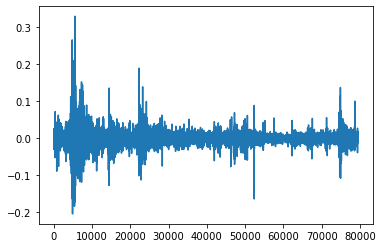

In [12]:
plt.plot(Z[:,0]);

In [13]:
Z_periods_classical = []
for period in [str(x) for x in range(first_year, last_year+1)]:
    df_period = df.loc[period]
    model = sklearn.decomposition.PCA()
    model.fit(df_period)
    Z_period = model.transform(df_period)
    Z_periods_classical.append(Z_period)
Z_periods_classical = np.vstack(Z_periods_classical)

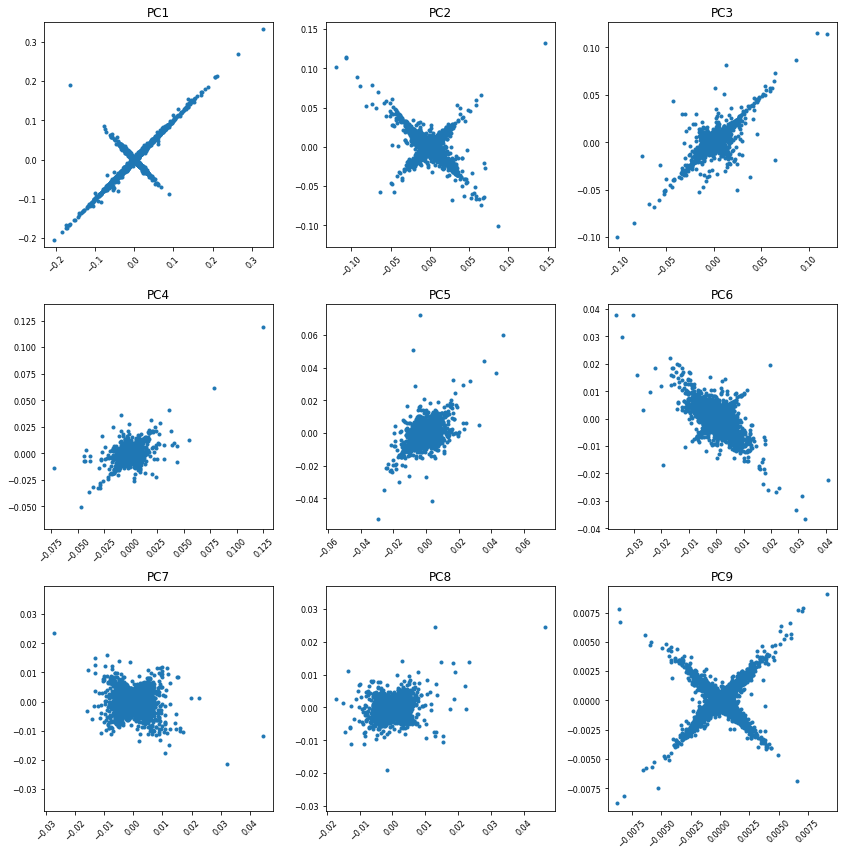

In [14]:
fig = plt.figure(figsize=(12, 12))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(Z[:,i], Z_periods_classical[:,i], '.')
    ax.set_title(f'PC{i+1}')
    ax.axis('equal')
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.tick_params(axis='x', rotation=45)
fig.tight_layout();

In [15]:
Z_periods_ipca = []
model = xpca.IPCA()
for period in [str(x) for x in range(first_year, last_year+1)]:
    df_period = df.loc[period]
    model.fit(df_period)
    Z_period = model.transform(df_period)
    Z_periods_ipca.append(Z_period)
Z_periods_ipca = np.vstack(Z_periods_ipca)

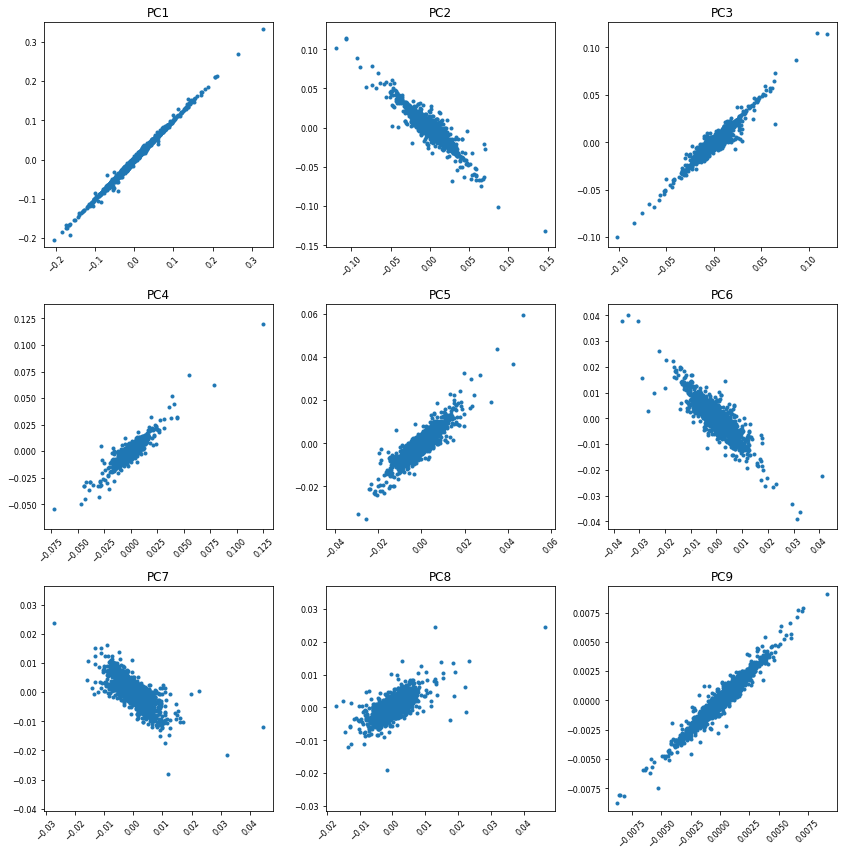

In [16]:
fig = plt.figure(figsize=(12, 12))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(Z[:,i], Z_periods_ipca[:,i], '.')
    ax.set_title(f'PC{i+1}')
    ax.axis('equal')
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.tick_params(axis='x', rotation=45)
fig.tight_layout();